In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 

# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [18]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Diagnosis
B    357
M    212
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

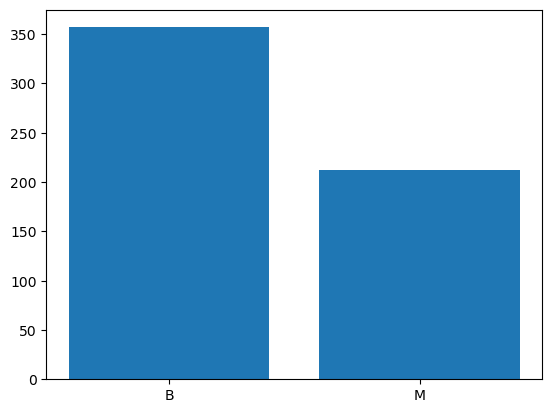

In [185]:
value_counts = y['Diagnosis'].value_counts()
print(value_counts)

plt.bar(value_counts.index, value_counts.values)
plt.show

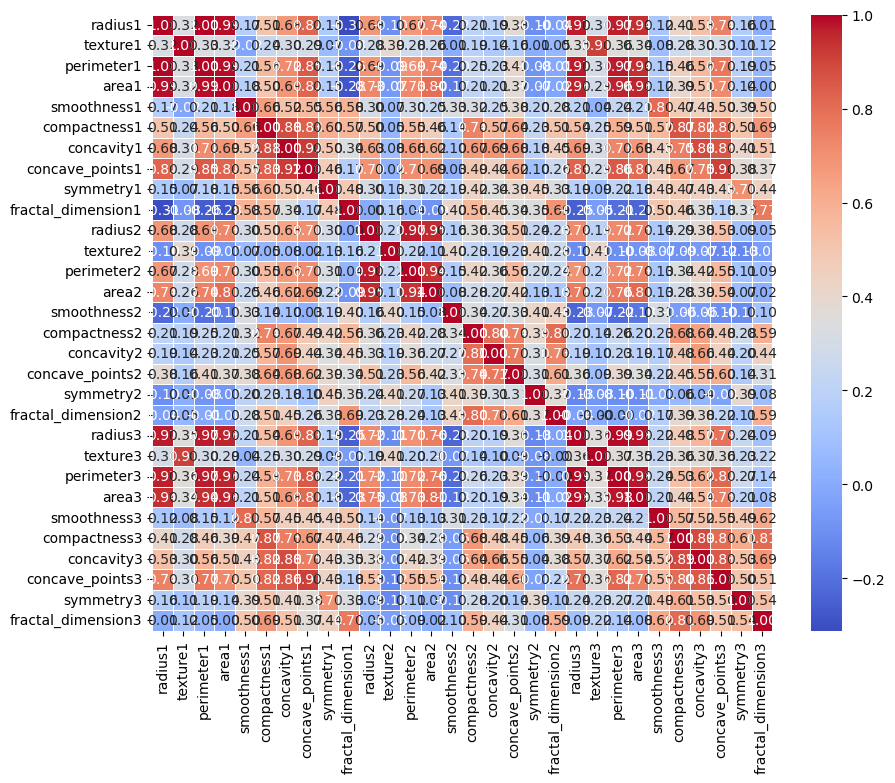

In [20]:
# Create correlation matrix
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

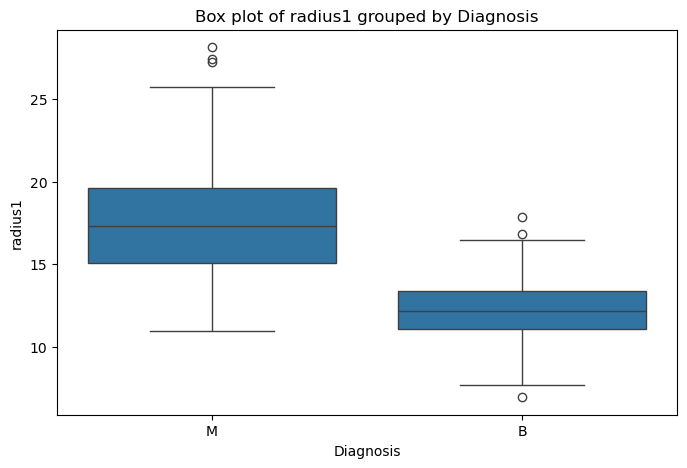

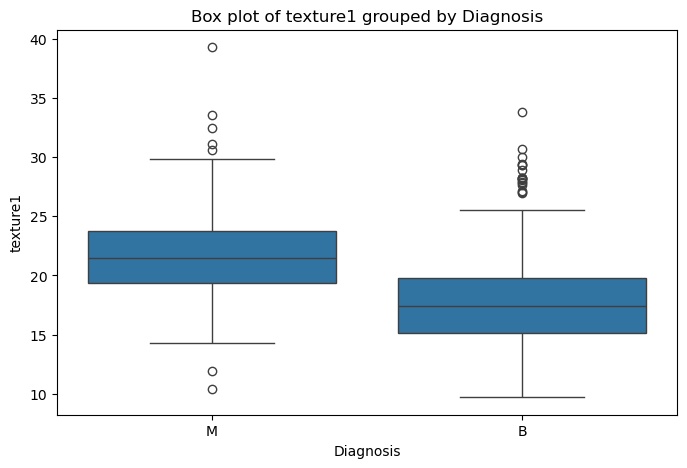

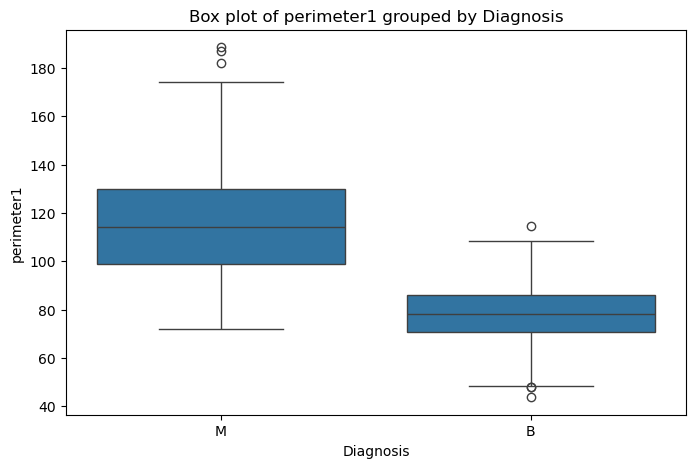

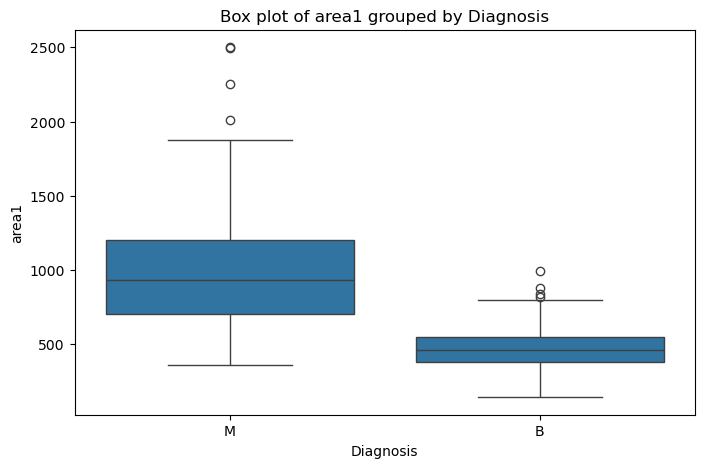

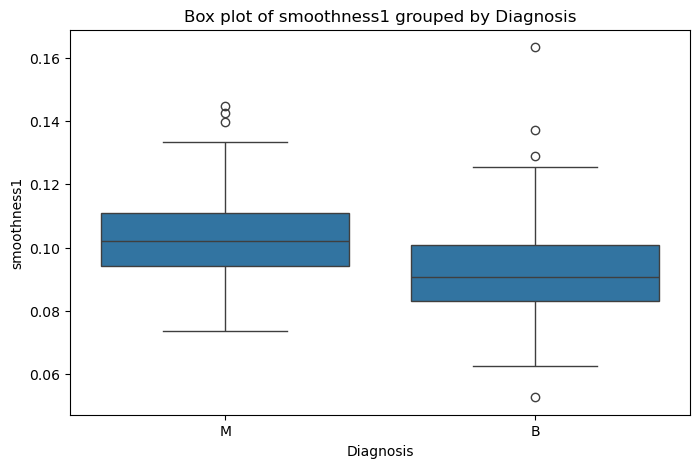

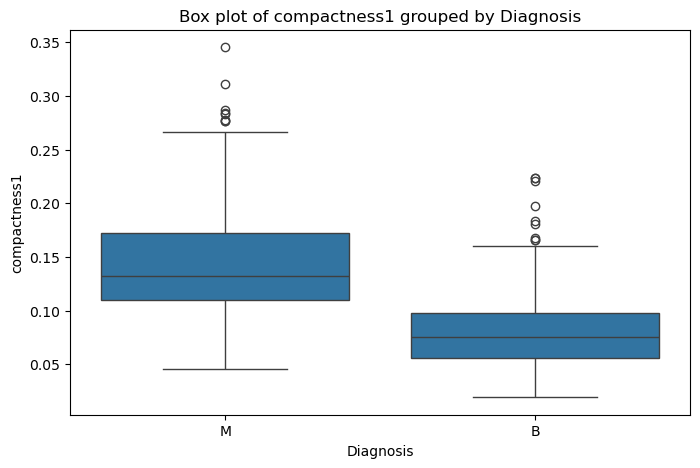

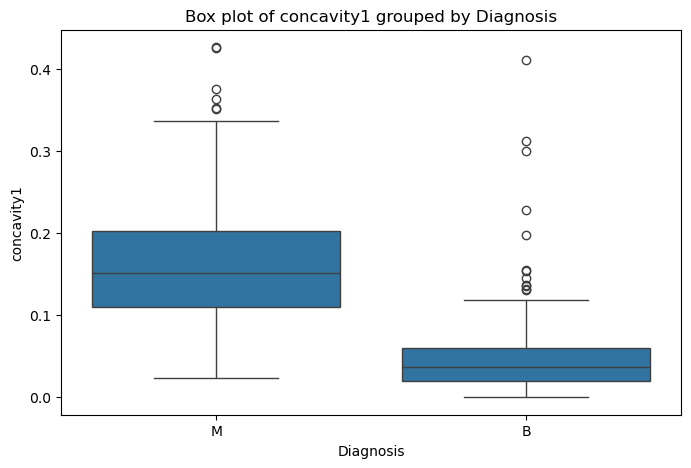

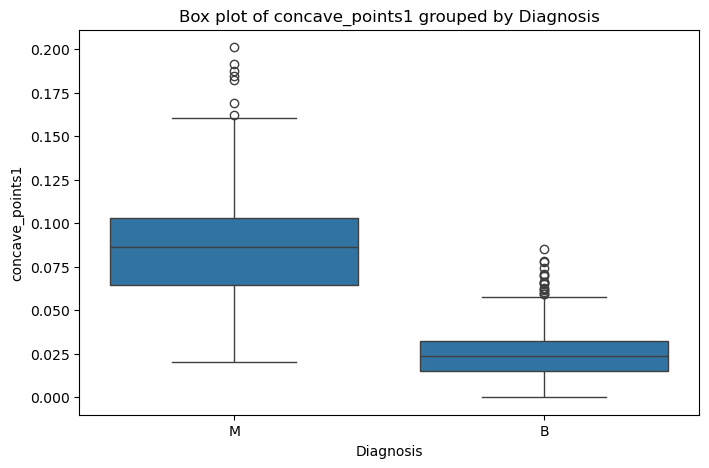

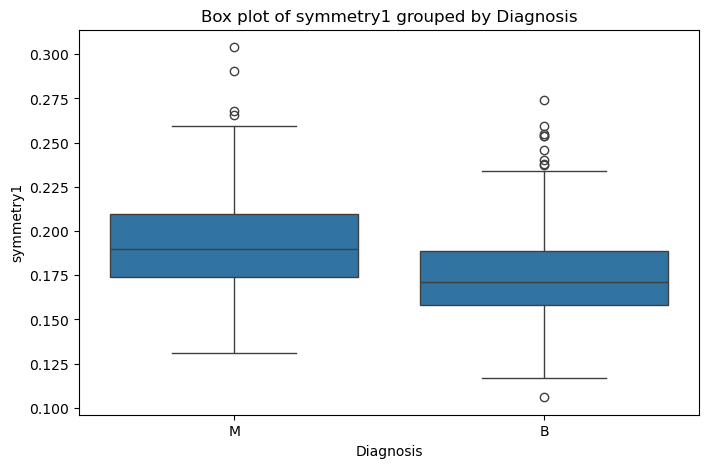

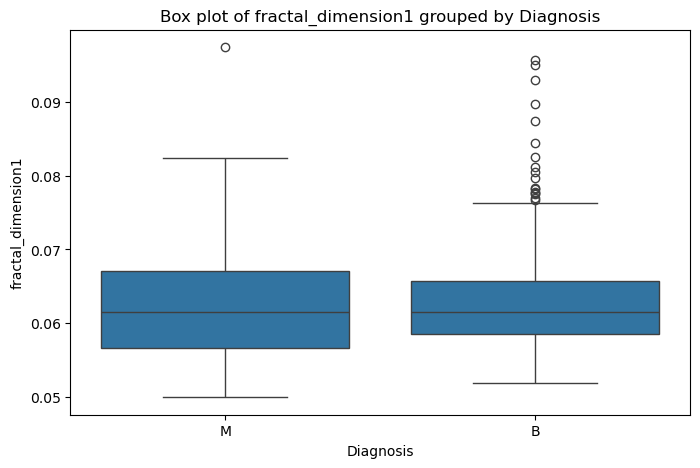

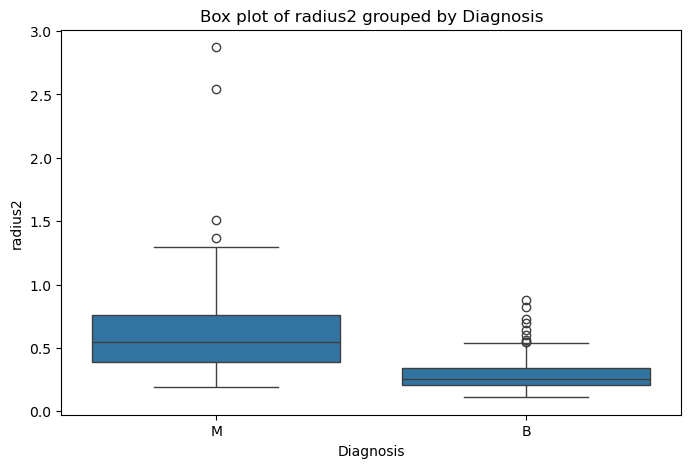

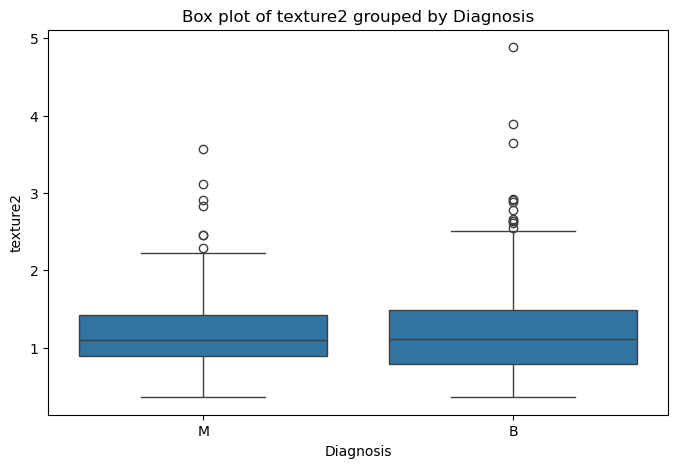

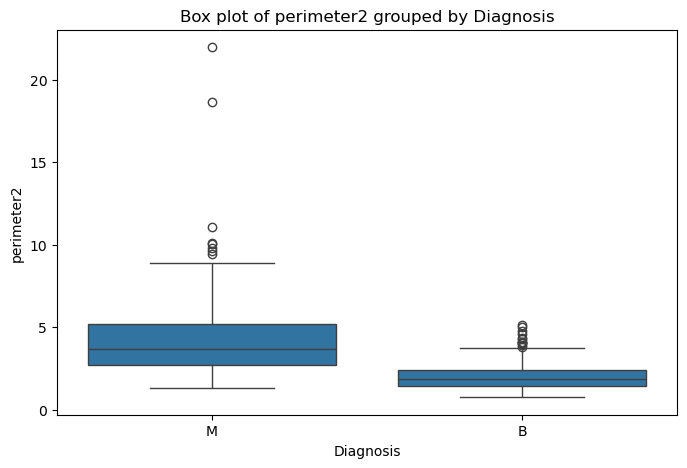

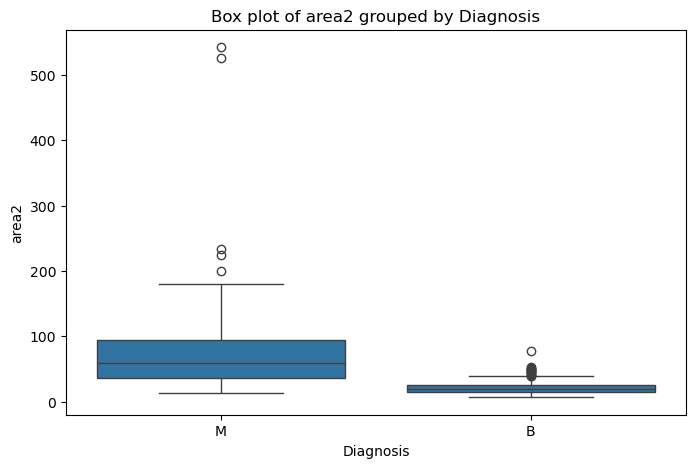

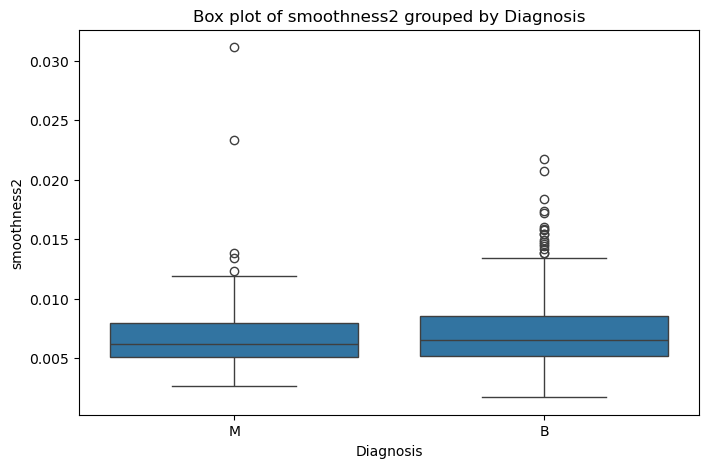

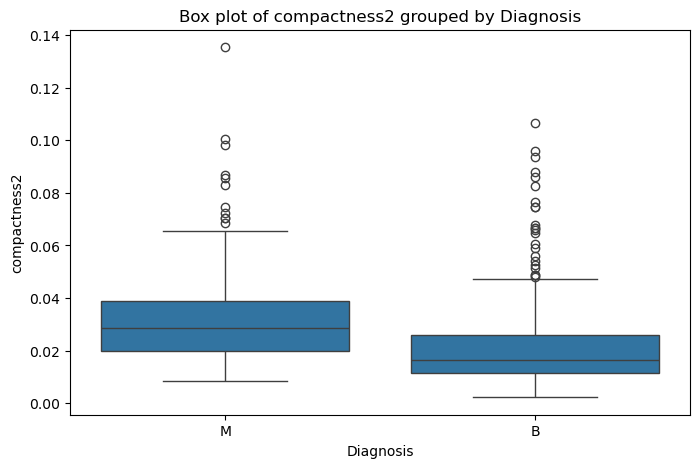

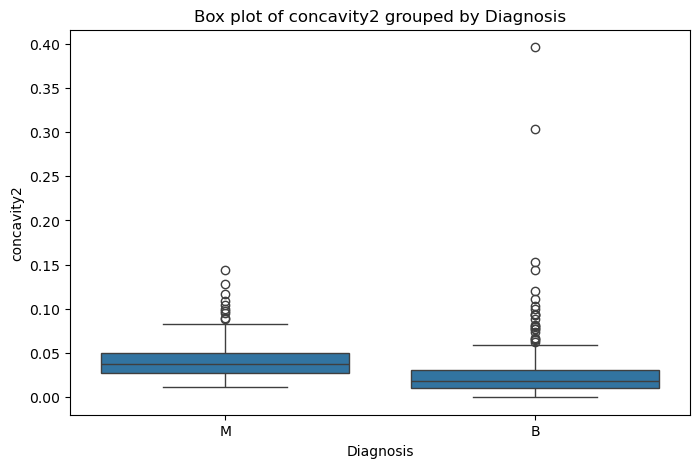

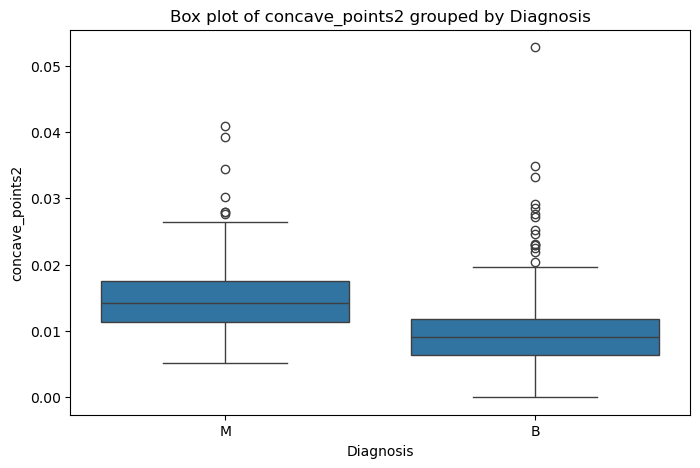

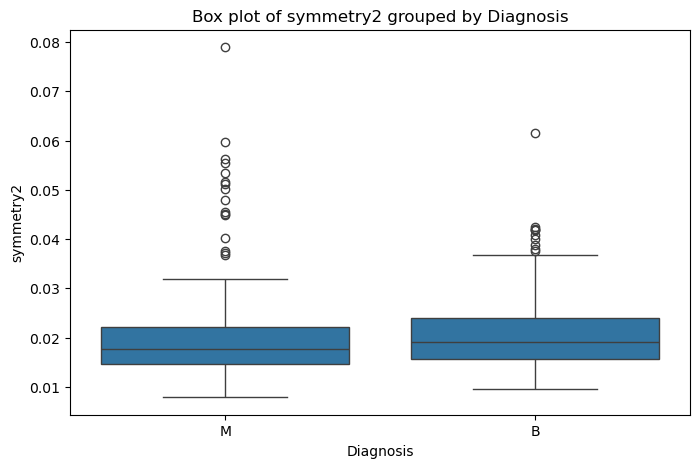

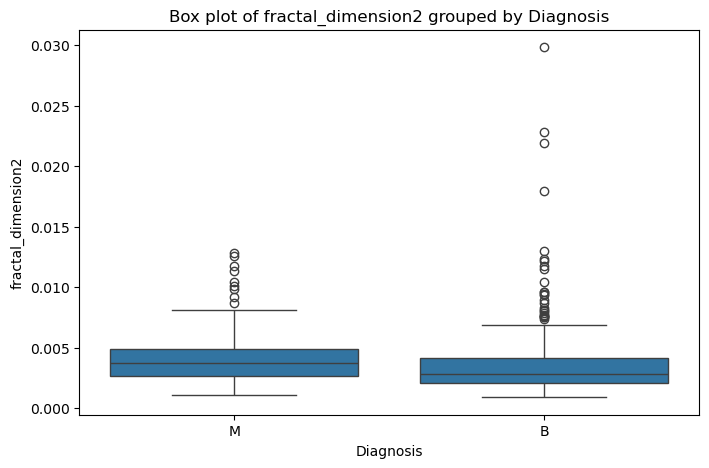

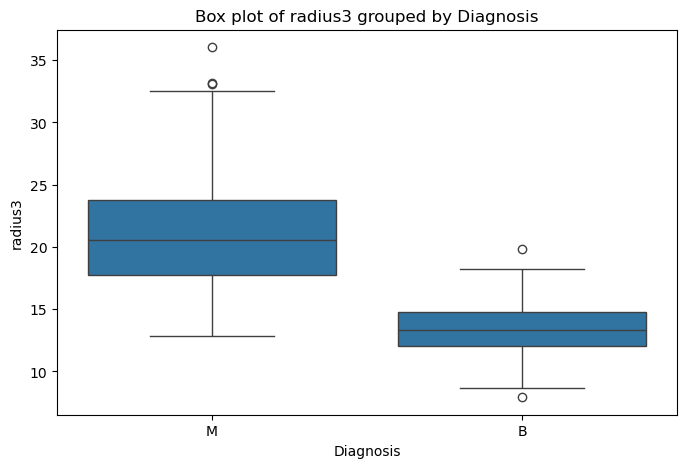

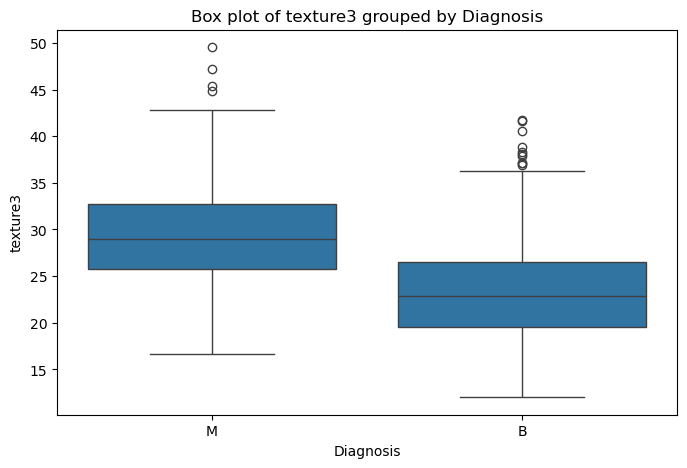

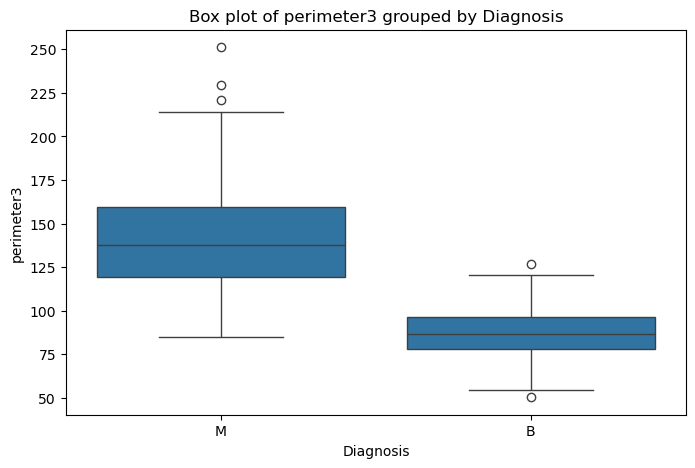

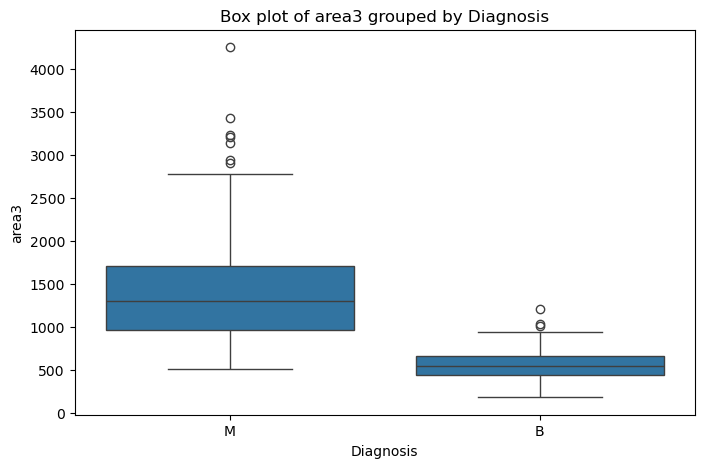

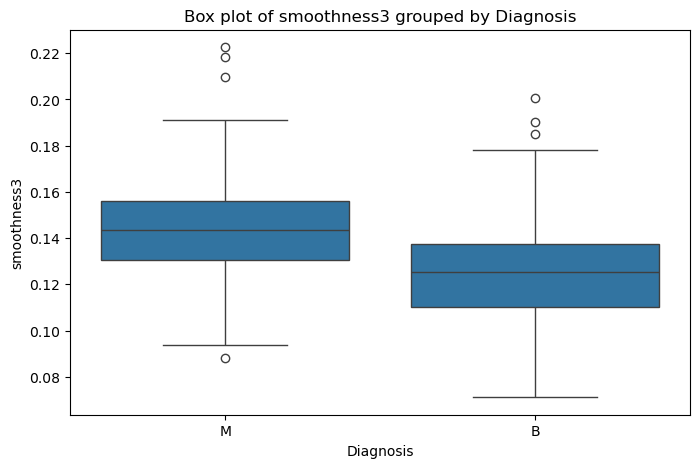

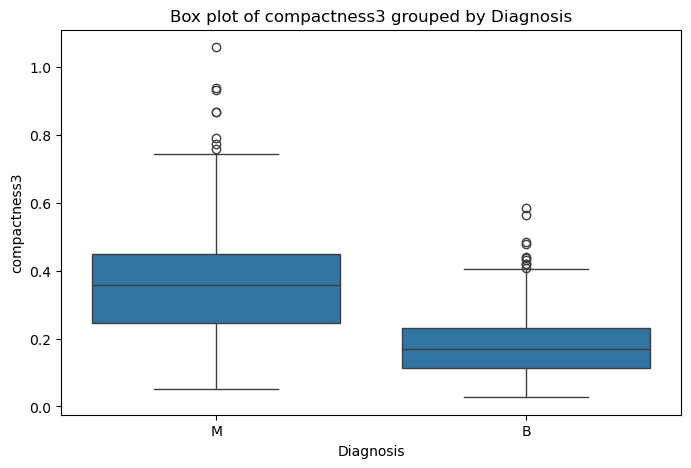

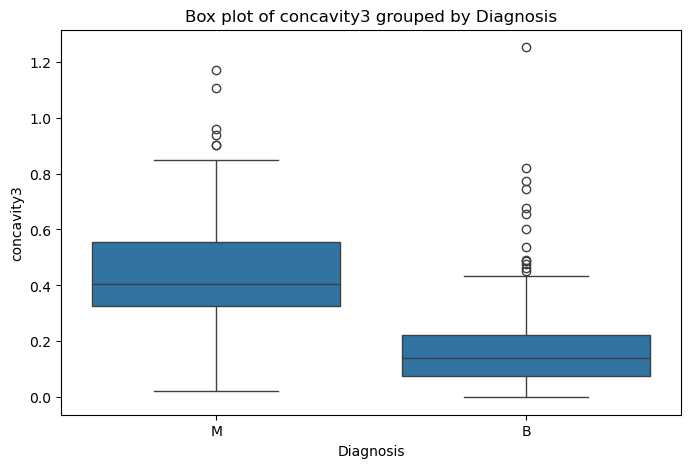

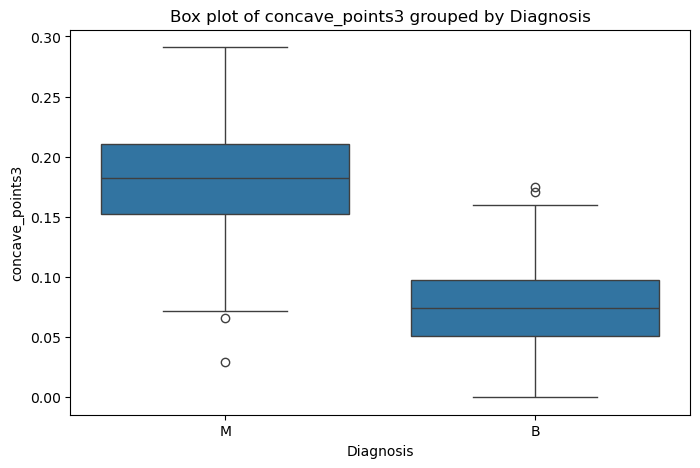

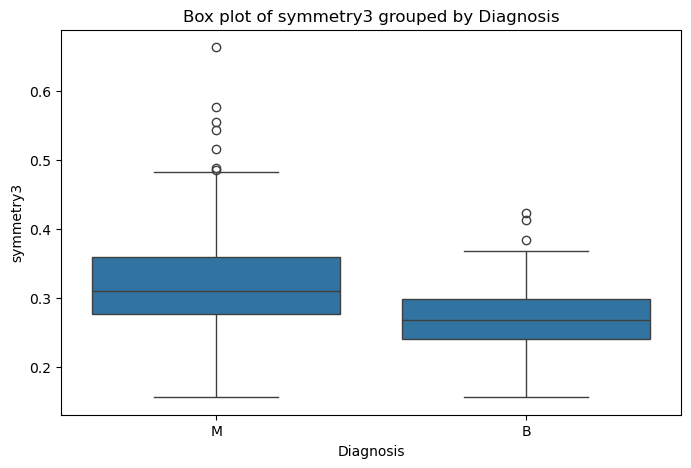

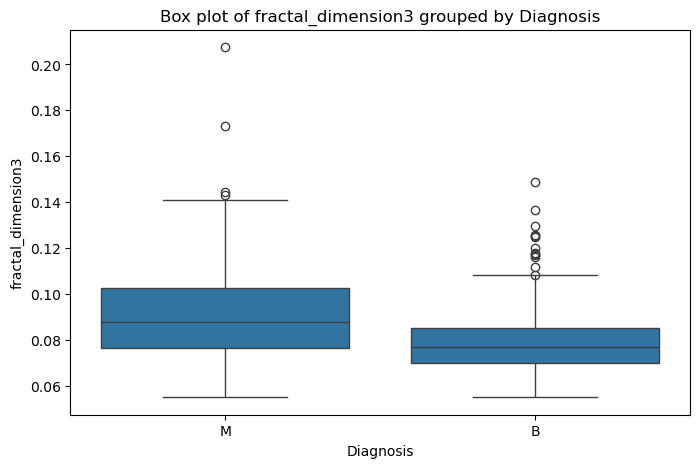

In [21]:
# Combine X and y into a single DataFrame for easier plotting
df = pd.concat([X, y.squeeze()], axis=1)

# Create boxplots for all numeric columns grouped by the binary feature
for col in df.columns:
    if col != 'Diagnosis':  # Skip the binary feature itself
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df['Diagnosis'], y=df[col])
        plt.title(f'Box plot of {col} grouped by {'Diagnosis'}')
        plt.show()

concave_points3       0.793566
perimeter3            0.782914
concave_points1       0.776614
radius3               0.776454
perimeter1            0.742636
area3                 0.733825
radius1               0.730029
area1                 0.708984
concavity1            0.696360
concavity3            0.659610
compactness1          0.596534
compactness3          0.590998
radius2               0.567134
perimeter2            0.556141
area2                 0.548236
texture3              0.456903
smoothness3           0.421465
symmetry3             0.416294
texture1              0.415185
concave_points2       0.408042
smoothness1           0.358560
symmetry1             0.330499
fractal_dimension3    0.323872
compactness2          0.292999
concavity2            0.253730
fractal_dimension2    0.077972
symmetry2            -0.006522
texture2             -0.008303
fractal_dimension1   -0.012838
smoothness2          -0.067016
Name: Diagnosis, dtype: float64


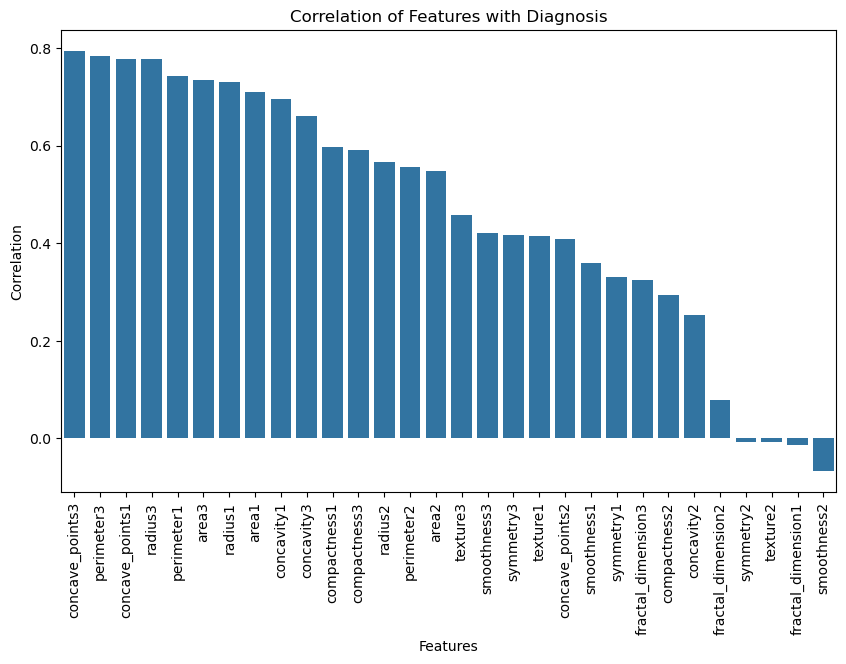

In [22]:
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Correlation of 'Diagnosis' with all other features
correlation = df.corr()['Diagnosis'].drop('Diagnosis').sort_values(ascending=False)

# Display the correlation values
print(correlation)

# Plot sorted correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Diagnosis')
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.show()

In [23]:
y_binary = y['Diagnosis'].map({'M': 1, 'B': 0})

In [24]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size = 0.2, random_state=42, stratify=y_binary)

0.9649122807017544
0.95


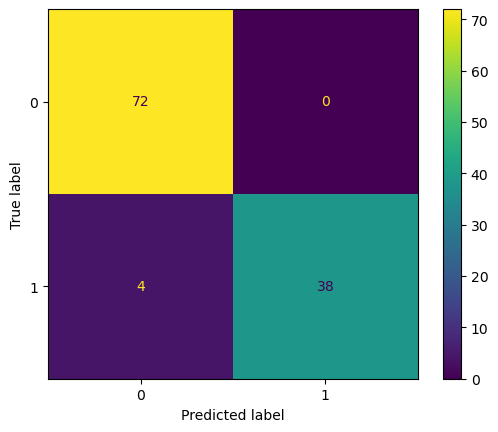

In [97]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

svc = SVC(C=1, kernel = 'linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svc.classes_)
disp.plot()

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
# Baseline SVM

In [101]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 3, 'kernel': 'rbf'}


0.9824561403508771
0.975609756097561


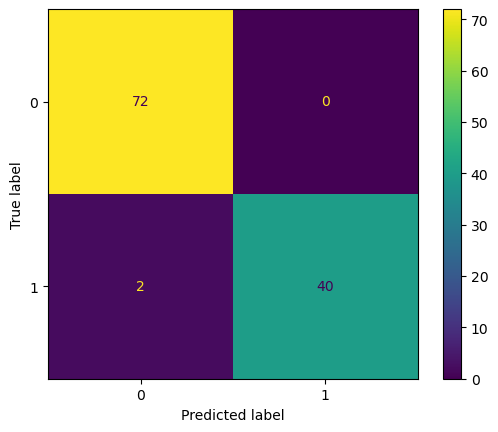

In [103]:
svc = SVC(C=3, kernel = 'rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svc.classes_)
disp.plot()

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
# Gridsearch SVM

In [165]:
from sklearn.feature_selection import RFE, SequentialFeatureSelector

svc2 = SVC(kernel='linear', C=3) 
selector = RFE(svc2, n_features_to_select=10) 
selector.fit(X_train, y_train) 
selector.ranking_

array([14, 19, 15, 10, 13,  7,  4,  1, 21,  8,  1,  1, 18,  1,  9, 11,  1,
        1,  3,  6,  5,  1, 20,  1, 16,  1,  1, 12,  2, 17])

In [167]:
selected_features = X_train.columns[selector.support_]

for feature in selected_features:
    print(f" {feature}")

 concave_points1
 radius2
 texture2
 area2
 concavity2
 concave_points2
 texture3
 area3
 compactness3
 concavity3


Accuracy: 0.9649122807017544
F1 Score: 0.95


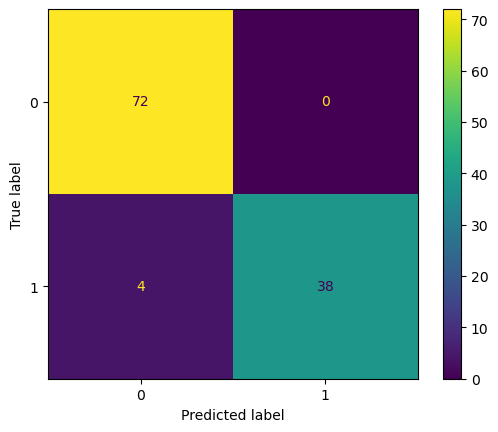

In [169]:

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

svc.fit(X_train_selected, y_train)

y_pred = svc.predict(X_test_selected)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
# SVM with feature selection

0.9210526315789473
0.8888888888888888


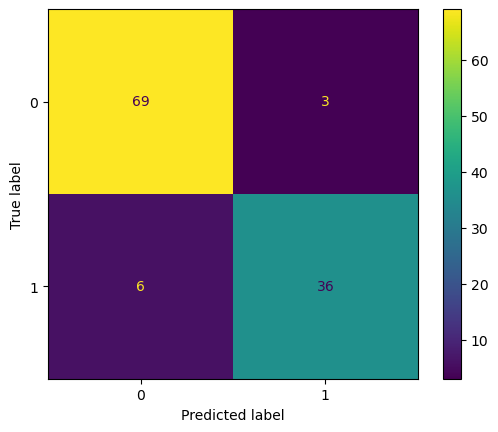

In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gnb.classes_)
disp.plot()

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
# Baseline Naive Bayes

In [181]:

nb_fs = GaussianNB()

selector = SequentialFeatureSelector(nb_fs, direction='backward', n_features_to_select=10) # forward - adds best features, backward - drops the worst features

selector.fit(X_train, y_train)

# Get the selected features
selected_features2 = X_train.columns[selector.get_support()]
print(f"Selected Features: {selected_features2}")

Selected Features: Index(['texture1', 'perimeter2', 'area2', 'concavity2', 'radius3', 'texture3',
       'area3', 'concavity3', 'concave_points3', 'symmetry3'],
      dtype='object')


Accuracy: 0.956140350877193
F1 Score: 0.9367088607594937


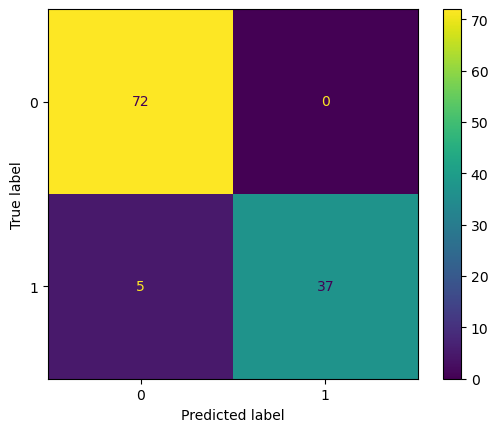

In [182]:

# Use only the selected features for training and testing
X_train_selected = X_train[selected_features2]
X_test_selected = X_test[selected_features2]

# Fit the model again on the selected features
nb_fs.fit(X_train_selected, y_train)

# Predict using the trained model
y_pred = nb_fs.predict(X_test_selected)

# Confusion matrix and metrics
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_fs.classes_)
disp.plot()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
# Naive Bayes with feature selection